<a href="https://colab.research.google.com/github/TaufeeqAhmed/EIP-Session1/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.layers import SeparableConv2D

In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols, img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))
# In training set there are 50,000 images with 32x32x3 where 3 indicates channels
# There are 10 unique classes in this dataset
# In test set there are 10,000 images

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
train_labels[:2]

array([[6],
       [9]], dtype=uint8)

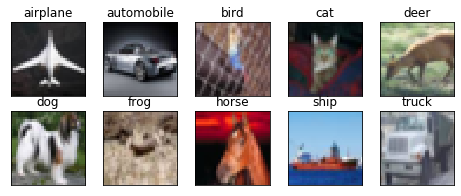

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [9]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # 32x32x48
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))  # 30x30x48
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 15x15x48
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same')) #15x15x96 Keeping padding same
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))  # 13x13x96
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 6x6x96
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same')) #6x6x192 Keeping padding same
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))  # 4x4x192 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #2x2x192
model.add(Dropout(0.25))
model.add(Flatten())  # 4x198 = 768
model.add(Dense(512))  # 512 fully connected layers
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))   # 256 fully connected layers
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) # 10 fully connected layers equal to number of classes
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [11]:
print(model.output_shape)

(None, 10)


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 29s 73ms/step - loss: 1.8639 - acc: 0.2853 - val_loss: 1.4656 - val_acc: 0.4531
Epoch 2/50
390/390 [==============================] - 20s 52ms/step - loss: 1.3496 - acc: 0.5119 - val_loss: 1.1215 - val_acc: 0.5987
Epoch 3/50
390/390 [==============================] - 20s 52ms/step - loss: 1.1045 - acc: 0.6095 - val_loss: 1.0061 - val_acc: 0.6454
Epoch 4/50
390/390 [==============================] - 20s 51ms/step - loss: 0.9504 - acc: 0.6662 - val_loss: 0.8451 - val_acc: 0.7057
Epoch 5/50
390/390 [==============================] - 20s 51ms/step - loss: 0.8603 - acc: 0.7020 - val_loss: 0.7780 - val_acc: 0.7323
Epoch 6/50
390/390 [==============================] - 20s 51ms/step - loss: 0.7837 - acc: 0.7304 - val_loss: 0.7617 - val_acc: 0.7377
Epoch 7/50
390/390 [==============================] - 20s 51ms/step - loss: 0.7282 - acc: 0.7532 - val_loss: 0.6906 - val_acc: 0.7621
Epoch 8/50
390/390 [==============================] - 

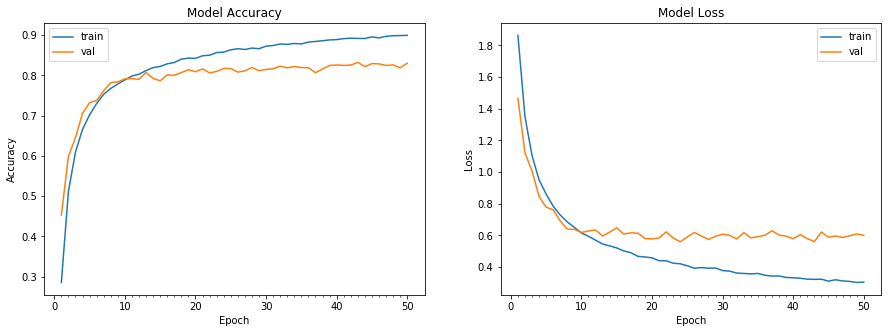

Accuracy on test data is: 83.04


In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [14]:
#it uses depthwise separable convolution ONLY (no Conv2D)
#it uses BatchNormalization 
#has less than 100,000 parameters
#it uses proper dropout values
#you've mentioned the output size for each layer
#you've mentioned the receptive field for each layer
#runs for 50 epochs
#beats the validation score within 50 epochs (at any epoch run, doesn't need to be final one)
# Define the model

#Final Validation accuracy for Base Network
#Your model definition (model.add... ) with output channel size and receptive field
#Your 50 epoch logs


modelNew = Sequential()

modelNew.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))  # output(32,32,48) R.F(3,3),K.size(3,3,1)
modelNew.add(BatchNormalization()) 
modelNew.add(Activation('relu')) 

modelNew.add(SeparableConv2D(48, 3, 3)) # output(30,30,48) R.F(5,5),K.size(3,3,1)
modelNew.add(BatchNormalization())
modelNew.add(Activation('relu'))

modelNew.add(MaxPooling2D(pool_size=(2, 2))) # output(15,15,48) R.F(10,10)
modelNew.add(Dropout(0.2))

modelNew.add(SeparableConv2D(96, 3, 3, border_mode='same')) # output(15,15,96) R.F(12,12),K.size(3,3,1)
modelNew.add(BatchNormalization())
modelNew.add(Activation('relu'))

modelNew.add(SeparableConv2D(96, 3, 3)) # output(13,13,96) R.F(14,14),K.size(3,3,1)
modelNew.add(BatchNormalization())
modelNew.add(Activation('relu'))

modelNew.add(MaxPooling2D(pool_size=(2, 2))) # output(6,6,96) R.F(28,28)
modelNew.add(Dropout(0.2))

modelNew.add(SeparableConv2D(192, 3, 3, border_mode='same')) # output(6,6,192) R.F(30,30),K.size(3,3,1)
modelNew.add(BatchNormalization())
modelNew.add(Activation('relu'))

modelNew.add(SeparableConv2D(192, 3, 3)) # output(4,4,192) R.F(32,32),K.size(3,3,1)
modelNew.add(BatchNormalization())
modelNew.add(Activation('relu'))

modelNew.add(MaxPooling2D(pool_size=(2, 2))) # output(2,2,192) R.F(64,64),K.size(3,3,1)
modelNew.add(Dropout(0.2))

modelNew.add(SeparableConv2D(num_classes, 4, border_mode='same')) 

modelNew.add(GlobalAveragePooling2D())
modelNew.add(Activation('softmax')) 

# Compile the modelNew
modelNew.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelNew.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel

NameError: ignored

In [0]:
model_new.summary()

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.004 * 1/(1 + 0.319 * epoch), 10)

datagen = ImageDataGenerator(zoom_range=0.0, rotation_range=40,
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model_new.fit_generator(datagen.flow(train_features, train_labels, batch_size = 64),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model_new took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_new))

In [0]:
print(model_new.output_shape)

In [0]:
train_features.shape